## Basic Concept

In [5]:
import pickle

In [6]:
# https://www.pythoncentral.io/how-to-pickle-unpickle-tutorial/
pickle.HIGHEST_PROTOCOL # Protocol Version 4. It adds support for very large objects, pickling more kinds of objects, and some data format optimizations.

4

In [7]:
pickle.DEFAULT_PROTOCOL # Protocol Version 3.

3

In [8]:
python_obj = {1:"A",2:"B",3:"C",4:"D",5:"E"} # python object can be list, dict etc.

In [9]:
pickling_on = open("Emp.pickle","wb")
pickle.dump(python_obj, pickling_on)
pickling_on.close()

In [10]:
pickle_off = open("Emp.pickle","rb")
python_obj = pickle.load(pickle_off)
print(python_obj)

{1: 'A', 2: 'B', 3: 'C', 4: 'D', 5: 'E'}


## Pickle on Cifar-10 Data

In [11]:
import numpy as np
import pickle
from pathlib import Path

In [15]:
import matplotlib.pyplot as plt

In [20]:
# Path to the unzipped CIFAR data
# source: https://www.cs.toronto.edu/~kriz/cifar.html
data_dir = Path("./cifar-10-batches-py/")

In [4]:
# Unpickle function provided by the CIFAR hosts
def unpickle(file):
    with open(file, "rb") as fo:
        dict = pickle.load(fo, encoding="bytes")
    return dict

Flat image size (For R, G & B): 3072
[ 59  43  50 ... 140  84  72]


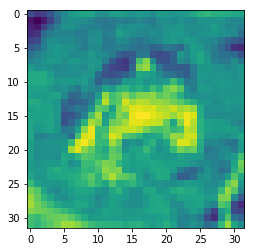

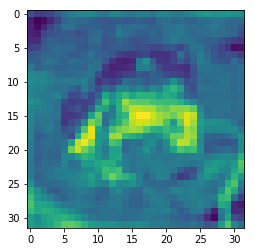

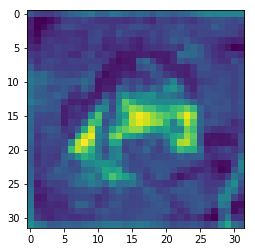

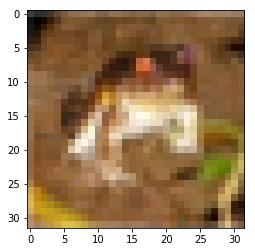

6
Flat image size (For R, G & B): 3072
[ 35  27  25 ... 169 168 168]


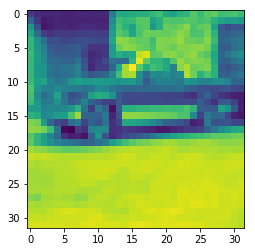

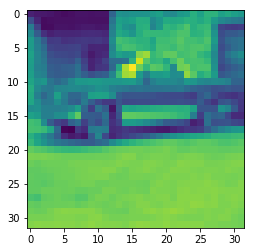

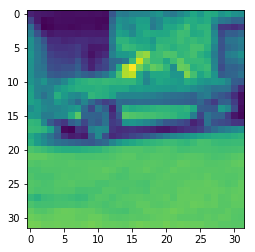

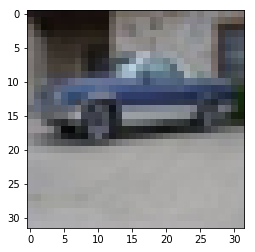

1
Flat image size (For R, G & B): 3072
[255 252 253 ... 173 231 248]


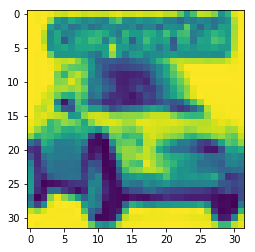

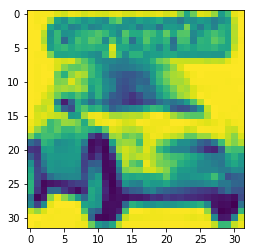

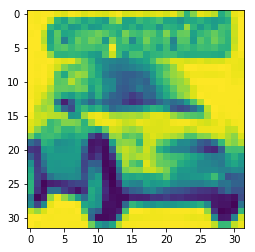

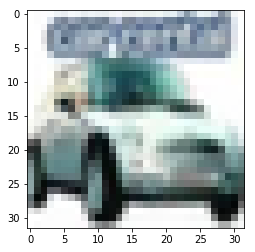

1
Flat image size (For R, G & B): 3072
[178 178 178 ...  80  80  77]


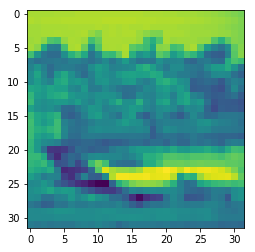

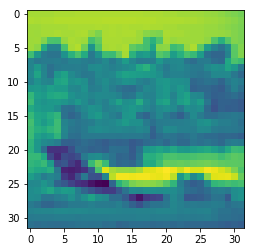

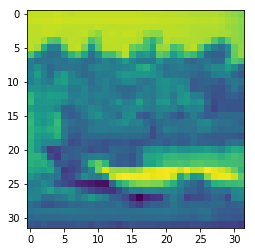

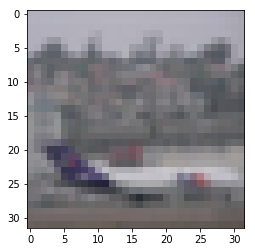

0
Flat image size (For R, G & B): 3072
[26 17 13 ... 27 26 27]


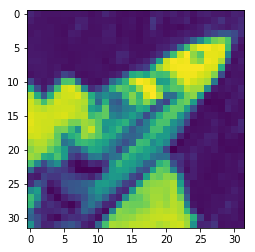

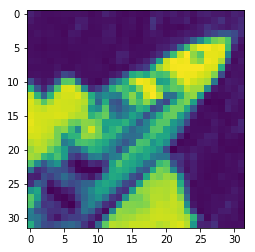

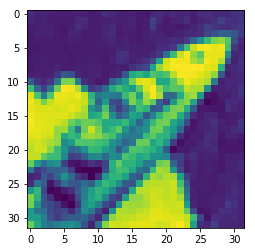

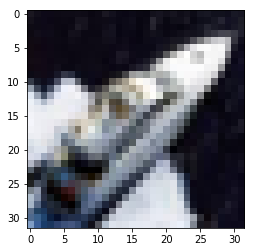

8
Loaded CIFAR-10 training set:
 - np.shape(images)     (5, 32, 32, 3)
 - np.shape(labels)     (5,)


In [29]:
images, labels = [], []
for batch in data_dir.glob("data_batch_*"):
    batch_data = unpickle(batch)
    for i, flat_im in enumerate(batch_data[b"data"]):
        print("Flat image size (For R, G & B):", len(flat_im))
        print(flat_im)
        
        im_channels = []
        # Each image is flattened, with channels in order of R, G, B
        for j in range(3):
            im_channels.append(
                flat_im[j * 1024 : (j + 1) * 1024].reshape((32, 32))
            )
            
            # show the original image for each channel
            plt.imshow(flat_im[j * 1024 : (j + 1) * 1024].reshape((32, 32)))
            plt.show()
            
        # Reconstruct the original image
        plt.imshow(np.dstack((im_channels)))
        plt.show()
        images.append(np.dstack((im_channels)))
        # Save the label
        print(batch_data[b"labels"][i])
        labels.append(batch_data[b"labels"][i])
        break
        
print("Loaded CIFAR-10 training set:")
print(f" - np.shape(images)     {np.shape(images)}")
print(f" - np.shape(labels)     {np.shape(labels)}")

In [12]:
from pathlib import Path

disk_dir = Path("data/disk/")
lmdb_dir = Path("data/lmdb/")
hdf5_dir = Path("data/hdf5/")

In [13]:
disk_dir.mkdir(parents=True, exist_ok=True)
lmdb_dir.mkdir(parents=True, exist_ok=True)
hdf5_dir.mkdir(parents=True, exist_ok=True)

In [14]:
from PIL import Image
import csv

def store_single_disk(image, image_id, label):
    """ Stores a single image as a .png file on disk.
        Parameters:
        ---------------
        image       image array, (32, 32, 3) to be stored
        image_id    integer unique ID for image
        label       image label
    """
    Image.fromarray(image).save(disk_dir / f"{image_id}.png")

    with open(disk_dir / f"{image_id}.csv", "wt") as csvfile:
        writer = csv.writer(
            csvfile, delimiter=" ", quotechar="|", quoting=csv.QUOTE_MINIMAL
        )
        writer.writerow([label])

https://realpython.com/storing-images-in-python/

---